In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X, Y = make_regression(n_samples = 400, n_features = 1, n_informative = 1, noise = 1.8, random_state = 11)

In [3]:
print(X.shape, Y.shape)

(400, 1) (400,)


In [4]:
Y = Y.reshape(-1, 1)

In [6]:
print(Y.shape)

(400, 1)


In [7]:
u = np.mean(X)
std = np.std(X)
X = (X - u) / std

In [9]:
pd.DataFrame(X).head()

,0
0,-0.868814
1,1.047967
2,-0.201968
3,-0.340171
4,0.133173


In [11]:
pd.DataFrame(X).describe()

,0
count,4.000000e+02
mean,2.442491e-17
std,1.001252e+00
min,-2.712230e+00
25%,-6.955402e-01
50%,1.736789e-03
75%,6.786954e-01
max,2.264513e+00


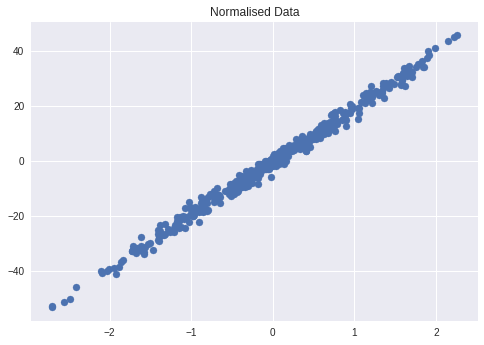

In [14]:
plt.style.use("seaborn")
plt.figure()
plt.scatter(X, Y)
plt.title("Normalised Data")
plt.show()

In [25]:
a = np.ones((X.shape[0], 1))

In [35]:
X_ = np.hstack((X, a))

In [36]:
theta = np.zeros((X_.shape[0], ))

In [37]:
theta = np.dot(np.dot(np.linalg.pinv(np.dot(X_.T, X_)), X_.T), Y)

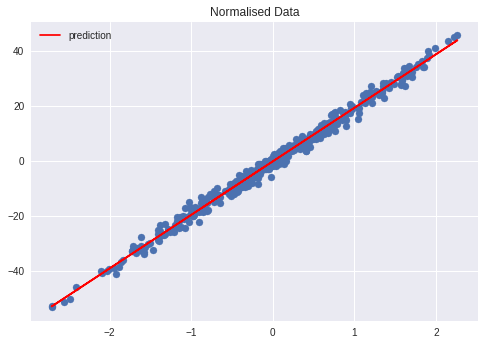

In [52]:
y_ = np.dot(X_, theta)
plt.style.use("seaborn")
plt.figure()
plt.scatter(X, Y)
plt.plot(X, y_, color = 'red', label = 'prediction')
plt.title("Normalised Data")
plt.legend()
plt.show()

In [39]:
def r2_score(y, y_) :
    num = np.sum((y - y_) ** 2)
    denom = np.sum((y - y.mean()) ** 2)
    score = 1 - (num / denom)
    return score * 100

In [40]:
print(r2_score(Y, y_))

99.21978559637155


In [42]:
print(theta) # [[theta1], [theta0]]

[[19.45877082]
 [-0.29187892]]


In [43]:
def predict(X, theta) :
    return np.dot(X, theta)

In [46]:
def getThetaClosedForm(X, Y) :
    A = np.dot(X.T, X)
    B = np.dot(X.T, Y)
    return np.dot(np.linalg.pinv(A), B)

In [47]:
print(getThetaClosedForm(X_, Y))

[[19.45877082]
 [-0.29187892]]


In [48]:
def getThetaClosedForm(X, Y) :
    Y = np.mat(Y)
    A = np.dot(X.T, X)
    B = np.dot(X.T, Y)
    return np.linalg.pinv(A) * B

In [49]:
print(getThetaClosedForm(X_, Y))

[[19.45877082]
 [-0.29187892]]
